# Data Mining Coursework Part 2 

I will be using real credit risk data to predict not credible and credible credit card clients. There are 23 predictor variables labeled that predict a response variable Y which represents a credit card default payment where Yes = 1, and No = 0. I will be using two datasets, where I will first be building models and testing on the training dataset, in which I will select the best predictive model and evaluate it on my test set.

In [1]:
%matplotlib inline

In [2]:
#importing any necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importing and assigning the datasets

In [4]:
#renaming column in the datasets to make them more readable
col_names = ['cc_default_payment','given_credit', 'gender', 'education', 'marriage', 'age',
'repayment_Sep', 'repayment_Aug', 'repayment_Jul', 'repayment_Jun',
'repayment_May', 'repayment_Apr', 'bill_Sep',
'bill_Aug', 'bill_July', 'bill_Jun',
'bill_May', 'bill_Apr', 'paid_Sep', 'paid_Aug',
'paid_Jul', 'paid_Jun', 'paid_May', 'paid_Apr']
#assigning df_train to the training set
df_train = pd.read_csv('data/creditdefault_train.csv', header=None, names = col_names, skiprows=[0])
#assigning df_test to the test set
df_test = pd.read_csv('data/creditdefault_test.csv', header=None, skiprows=[0])

### Accessing a specific element of the Training DataFrame

#### Retrieving the second col

In [6]:
x_train = df_train.iloc[:, 1:]  #retrieving the second column and after for x_train
y_train = df_train.iloc[:,0] #retrieving the first column for y_train

In [7]:
x_train.shape #displays the number of rows and columns in the training dataset

(15000, 23)

In [8]:
y_train.shape #displays the number of rows for the selected first column in y_Train

(15000,)

### Accessing a specific element of the Test DataFrame

In [10]:
x_test = df_test.iloc[:, 1:] #retrieving the second column and after for x_test
y_test = df_test.iloc[:,0] #retrieving the first column for y_test

### Displaying the training dataset

In [11]:
df_train.head().append(df_train.tail())

,cc_default_payment,given_credit,gender,education,marriage,age,repayment_Sep,repayment_Aug,repayment_Jul,repayment_Jun,...,bill_July,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
14999,1,80000,1,3,1,41,1,-1,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# K-Nearest Neighbour

First I will be implementing the k-Nearest Neighbour algorithm on my dataset to build my first predictive model, and testing the accuracy of the model. The kNN algorithm can be used for both classification and regression predictive problems and is commonly used for its ease of interpretation and the low time it takes to calculate problems.

In [14]:
#importing the KNeighborsClassifier module
from sklearn.neighbors import KNeighborsClassifier

 After setting the cross validation score to 3, we can test the accuracy of the classifier on the data

In [15]:
knn = KNeighborsClassifier()
#
score = cross_val_score(knn, x_train, y_train, cv=3, scoring='accuracy').mean()
score

0.7514

Above you can see I got an accuracy of around 75%, which is good for my first model, I will look at ways to tune my models to see if I can get a better accuracy score.

#### Plotting the validation score for each cross val from 1 to 30.

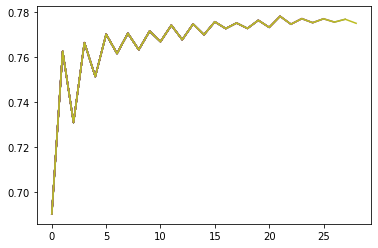

In [72]:
val_score=[]
for k in range (1,30):
  validation_score=cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=3, scoring='accuracy').mean()
  val_score.append(validation_score)

  plt.plot(val_score)

From the graph above you can see that the accuracy jumps instantly to around 0.765, and then fluctuates up and down until the end while also steadily increasing, giving a mean accuracy of 0.7514 or around 75%.

Text(0, 0.5, 'Accuracy')

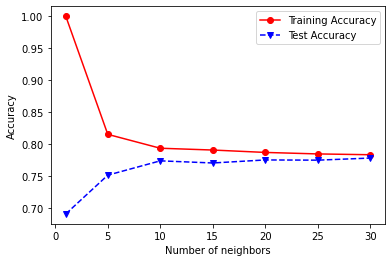

In [19]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

The  training accuracy starts of at 1, and decreases  depending on the number of neighbors. The higher the number of neighbors the lower the training accuracy in the model, however the test accuracy almost does the opposite, starts off at around 0, and slowly increases until the 30th numNeighbour, where it meets the training accuracy line.

# K-Nearest Neighbour 2

For the second model for kNN I will be tuning the cross validation slightly to see how the accuracy changes

In [21]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy').mean()
score

0.7508666666666668

The accuracy has slightly decreased when increasing the cross validation score from 3 to 5. The change is very little however this doesn't take away from the point that it decreased.

#### Plotting the validation score for each cross val from 1 to 10

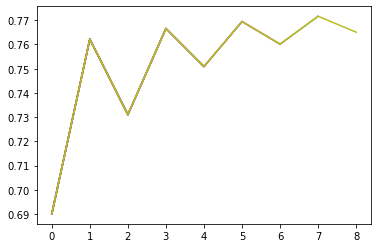

In [23]:
val_score=[]
for k in range (1,10):
  validation_score=cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean()
  val_score.append(validation_score)

  plt.plot(val_score)

From the graph above you can see that the accuracy jumps instantly to around 0.765, and then fluctuates up and down until the end while also steadily increasing, giving a mean accuracy of 0.7514 or around 75%.

Text(0, 0.5, 'Accuracy')

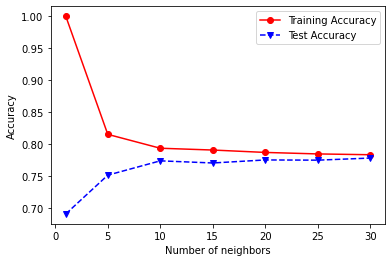

In [24]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Similar to The  training accuracy beforre, it starts of at 1, and decreases  depending on the number of neighbors. The higher the number of neighbors the lower the training accuracy in the model, however the test accuracy almost does the opposite, starts off at around 0, and slowly increases until the 30th numNeighbour, where it meets the training accuracy line.

# K-Nearest Neighbour 3

In [25]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy').mean()
score

0.7510000000000001

The accuracy has slightly increased when increasing the cross validation score from 5 to 10. The change is very little and I will be aiming for a higher accuracy score in the other models.

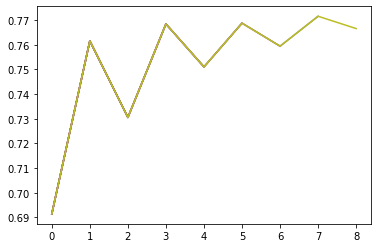

In [26]:
val_score=[]
for k in range (1,10):
  validation_score=cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=10, scoring='accuracy').mean()
  val_score.append(validation_score)

  plt.plot(val_score)

The graph above shows the validation score from 1 to 10, similarly to the previous graphs, changing the cross validation score has not changed much for the graph and they are very similar.

Text(0, 0.5, 'Accuracy')

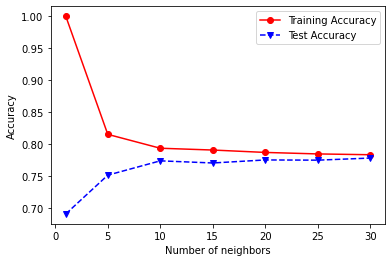

In [27]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Grid Search on kNN

Using Grid search on kNN to find the best model. Grid Search works by training the model several times on different parameters. Here we can test the model with the different parametsrs and find the best values to get the best accuracy score.

In [28]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

This model will take in a new classifier to find the best value for n neighbours.

In [29]:
from sklearn.model_selection import GridSearchCV
#creating a new knn model
knn2 = KNeighborsClassifier()
#creating a dictionary of all values we want to test for n_neighbours
param_grid = {'n_neighbors': np.arange(1, 25)}
#testing all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fitting the model to data
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

We can check which values for n neighbors that we tested performed the best by calling best_params_ on the model.

In [30]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 24}

We can see that the optimum value for n neighbors is 24, and using best_score_ we can check the accuracy of the model when n neighbors is 24. This outputs the mean accuracy of the best accuracy through cross validation.

In [31]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7774666666666666

The accuracy has increased by almost 3% after implementing grid search

# Random Forest

Random forest is an easy to use algorithm that produces good results a lot of the time. Random tree works by building a band of decision trees. These trees are merged and combined to build and increase the overall result of the model.

In [63]:
#importing the necessary libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [64]:
rclf = RandomForestClassifier()

score = cross_val_score(rclf, x_train, y_train, cv=5, scoring = 'accuracy').mean()
score

0.8158

I got an accuracy of 81% for my first Random forest model, which was really good. This was an increase of almost 4% from the previous knn model in Grid Search

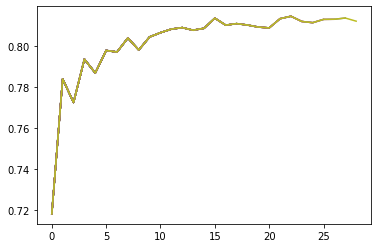

In [36]:
val_score=[]
for k in range (1,30):
  validation_score=cross_val_score(RandomForestClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean()
  val_score.append(validation_score)

  plt.plot(val_score)

The graph above displays the cross validation score from range 1 to 30. The graph jumps to 78%, and then fluctuates until the 10th score. The graph then starts to level off and becaomes more stable until the end.


# Random Forest 2

In [70]:
rclf = RandomForestClassifier()


score = cross_val_score(rclf, x_train, y_train, cv=8, scoring = 'accuracy').mean()
score

0.8166

Increasing the cross validation score from 5 to 8 had no impact on the accuracy score for Random Forest which was quite unfortunate.

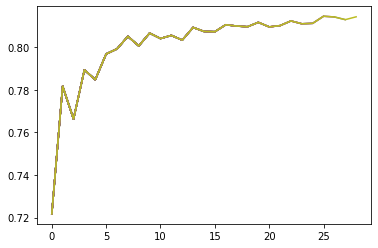

In [68]:
val_score=[]
for k in range (1,30):
  validation_score=cross_val_score(RandomForestClassifier(k), x_train, y_train, cv=8, scoring='accuracy').mean()
  val_score.append(validation_score)

  plt.plot(val_score)

# Decision Tree

Similarly to the previous algorithms, Decision Tree can also be used for solving classification and regression problems. Decision trees can create a training model that can be used to predict the class from previous training data.

In [71]:
#important necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Extracting the predictor 'x_train' and target default payment 'y_train' attributes from the dataset and creating a decision tree classifier object using gini to measure the impurit for splitting.

In [41]:
y_train = df_train['cc_default_payment']
x_train = df_train.drop(['cc_default_payment'],axis=1)

clf = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=3)
clf = clf.fit(x_train, y_train)


### Creating the graph for the Decision tree

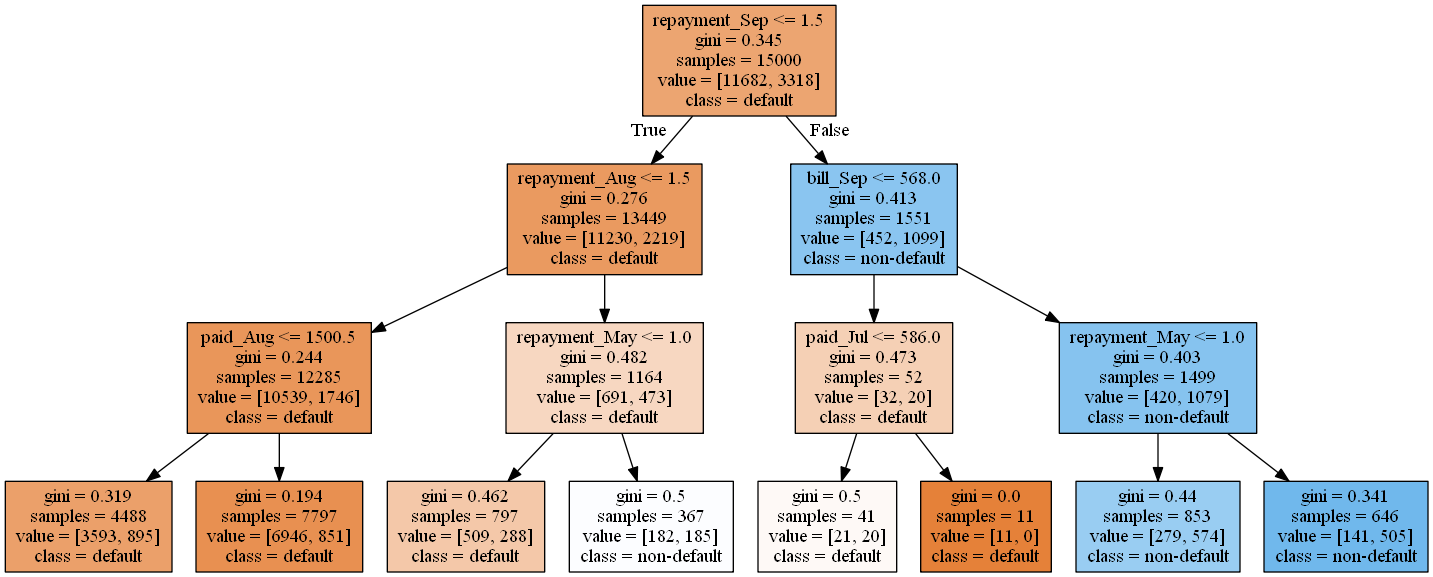

In [43]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=x_train.columns, class_names=['default','non-default'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [44]:
dclf = DecisionTreeClassifier()


score = cross_val_score(dclf, x_train, y_train, cv=10, scoring = 'accuracy').mean()
score

0.7216666666666666

# Decision Tree 2

Creating the second decision tree, this time changing the criterion to entropy as its impurity measure for splitting criterion

In [45]:
y_train = df_train['cc_default_payment']
x_train = df_train.drop(['cc_default_payment'],axis=1)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=3)
clf = clf.fit(x_train, y_train)

### Creating the graph for the Second Decision tree

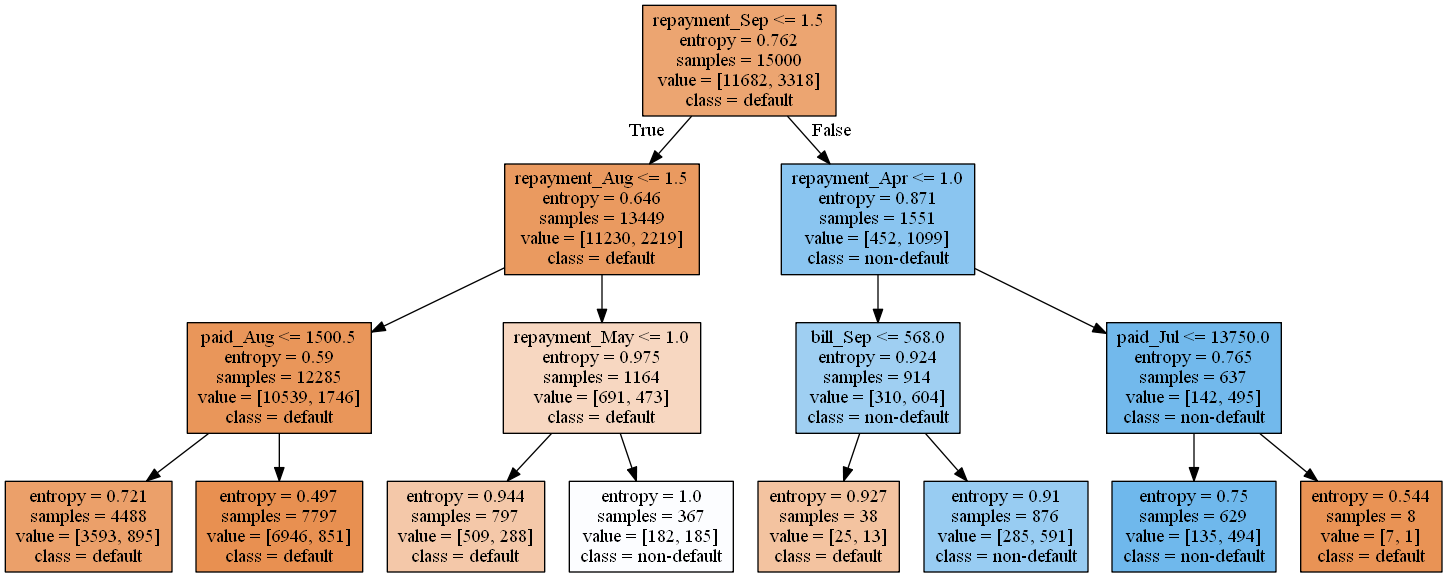

In [48]:
dot_data = tree.export_graphviz(clf, feature_names=x_train.columns, class_names=['default','non-default'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [47]:
score = cross_val_score(dclf, x_train, y_train, cv=3, scoring = 'accuracy').mean()
score

0.7232

# Decision Tree 3 - Using Grid search

Looking at the tree depth and how it results in better accuray, on the training set. I will do this by performing cross validation on the dataset with different tree depths from 2 to 20, and selecting the value leading to the best accuracy.

In [50]:
from sklearn.model_selection import cross_val_score
from pprint import pprint

depth = []
for i in range(2,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    # Perform 10-fold cross validation in parallel on 4 threads
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10, n_jobs=4)
    depth.append((i, scores.mean()))
print(depth)

[(2, 0.8217333333333332), (3, 0.8198000000000001), (4, 0.8194000000000001), (5, 0.8202666666666667), (6, 0.8202), (7, 0.8191333333333333), (8, 0.8130666666666666), (9, 0.8119999999999999), (10, 0.8079333333333333), (11, 0.8026), (12, 0.7992666666666668), (13, 0.7936666666666666), (14, 0.7866), (15, 0.7811333333333333), (16, 0.7757333333333334), (17, 0.7683333333333333), (18, 0.7646000000000001), (19, 0.7569333333333333)]


Tuning the model based on the hyper parameter, tree depth. The criterion (impurity) being measured using entropy.

In [52]:
parameters = {'max_depth':range(2,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters, cv=10, n_jobs=4)
clf.fit(X=x_train, y=y_train)
print ('Best accuracy and parameters are:', clf.best_score_, clf.best_params_) 

# now we get the best model trained on the entire training set
best_tree_model = clf.best_estimator_
print('\n The best model is: \n', best_tree_model)

Best accuracy and parameters are: 0.8217333333333332 {'max_depth': 2}

 The best model is: 
 DecisionTreeClassifier(criterion='entropy', max_depth=2)


# Evaluation

From the previous models, I have chosen the Decision Tree 3 - Using Grid search as the best model which was  DecisionTreeClassifier(criterion='entropy', max_depth=2). The original criterion parameter was gini, however using 'entropy' to measure the impurity of a split gave a better accuracy, with the trees max depth being 2.

## Trying best model on Test data

Using the best model 'DecisionTreeClassifier(criterion='entropy', max_depth=2)', on the Test data.

Comparing the credit card default payment, with the predicted default payment in a table and evaluating the accuracy of the model on the test data

In [61]:
predY = best_tree_model.predict(x_test)
predictions = pd.concat([y_test, pd.Series(predY,name='Predicted Default payment')], axis=1)
predictions

,0,Predicted Default payment
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [58]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.72


After using the best model on the test data, i received an accuracy score of 72%, 10% lower then the accuracy used on the training data

### References
    kNN - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
          https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
    Random Forest - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    Decision Tree - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html